In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [71]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [74]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [75]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [79]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [80]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first()
date

('2017-08-23')

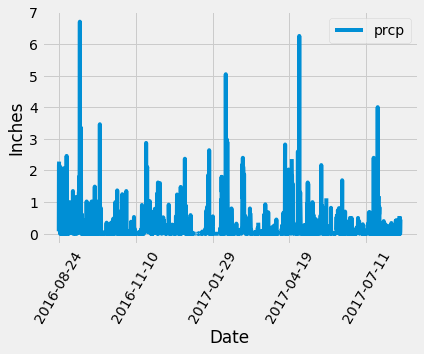

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > lastyear).\
    order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(precip_data)

# Sort the dataframe by date
precip_data_df.sort_values(by=["date"])
precip_data_df


# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(x='date', y='prcp')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation='60')
plt.show()

In [91]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(measurement).group_by(measurement.station).count()
print("There are {} stations available.".format(locations))

There are 9 stations available.


In [93]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestations = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

print(f'The lowest tempt is {lowest_temp}, highest is {highest_temp}, and average is {avg_temp}')

The lowest tempt is [(54.0,)], highest is [(85.0,)], and average is [(71.66378066378067,)]


In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yeartemp = session.query(measurement.tobs).\
      filter(measurement.date >= lastyear, measurement.station == 'USC00519281').\
      order_by(measurement.tobs).all()
yeartemp

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

Text(0.5, 0, 'Temperature')

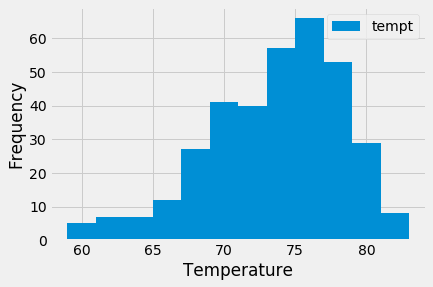

In [96]:
temp_obs = pd.DataFrame(session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').all(), columns=['tempt'])
temp_obs.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()